   #                            PRINCIPAL COMPONENT ANALYSIS  - Step by Step                                
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set

In [116]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [117]:
mean=[3,5]

In [118]:
#cov=[[1,3/5],[3/5,2]]
cov=[[1,15/5],[15/5,4]]

In [119]:
x,y = np.random.multivariate_normal(mean,cov,100).T

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


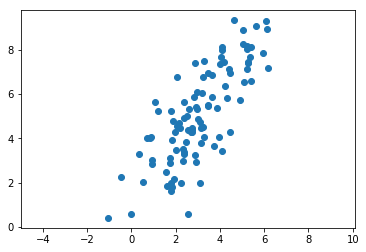

In [120]:
plt.plot(x, y, 'o')
plt.axis('equal')
plt.show()

# Step1: Standardization

In [121]:
std_dev_sqr = lambda x: sum([((xi - x.mean())**2)/len(x) for xi in x ])

In [122]:
def standardize(x):
    x_std = []
    for xi in x:
        x_std.append((xi  - x.mean())/np.sqrt(std_dev_sqr(x)))
    return np.array(x_std)

In [123]:
x_std = standardize(x)
y_std = standardize(y)

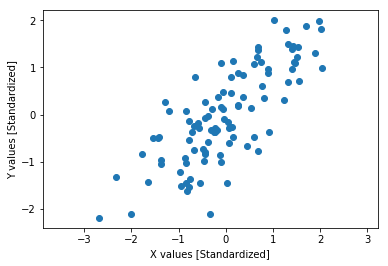

In [124]:
plt.plot(x_std, y_std, 'o')
plt.axis('equal')
plt.xlabel("X values [Standardized]")
plt.ylabel("Y values [Standardized]")
plt.show()

# Step 2: Covariance Matrix computation

For a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 matrix of this from:
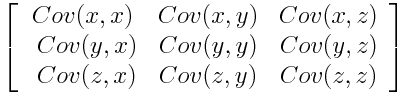

It’s actually the sign of the covariance that matters :
if positive then : the two variables increase or decrease together (correlated)
if negative then : One increases when the other decreases (Inversely correlated)
Now, that we know that the covariance matrix is not more than a table that summaries the correlations between all the possible pairs of variables

In [125]:
np.cov([x_std,y_std])

array([[1.01010101, 0.78823002],
       [0.78823002, 1.01010101]])

# Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components


Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.

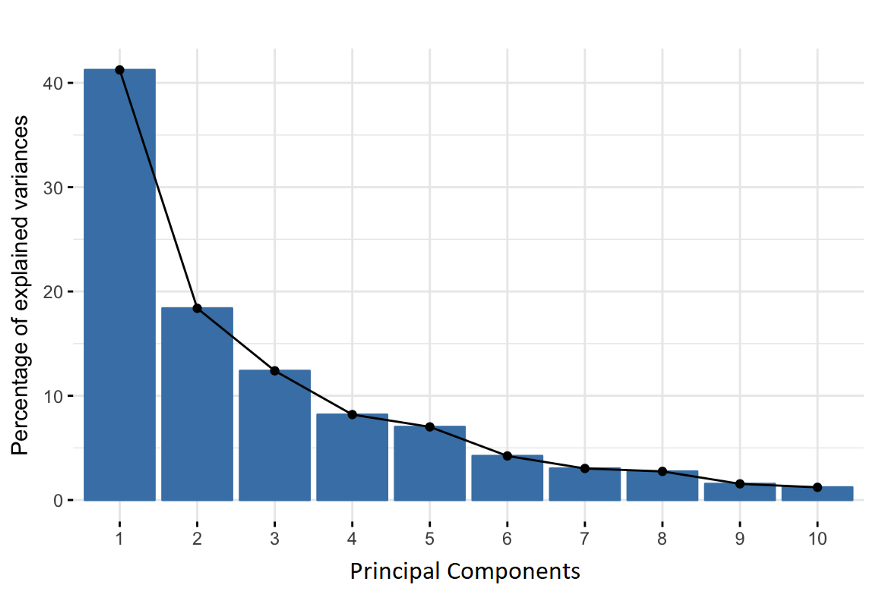

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

### Method of creating PRINCIPAL COMPONENT

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. For example, let’s assume that the scatter plot of our data set is as shown below, can we guess the first principal component ? Yes, it’s approximately the line that matches the purple marks because it goes through the origin and it’s the line in which the projection of the points (red dots) is the most spread out. Or mathematically speaking, it’s the line that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin).
![](https://miro.medium.com/max/875/1*UpFltkN-kT9aGqfLhOR9xg.gif)

The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., perpendicular to) the first principal component and that it accounts for the next highest variance.
This continues until a total of p principal components have been calculated, equal to the original number of variables.

it is eigenvectors and eigenvalues who are behind all the magic explained above, because the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance (most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

Let's calculate Eigen vector and eigen values of covariance matrix

In [126]:
eig_val,eig_vec = np.linalg.eig(np.cov([x_std,y_std]))

In [127]:
eig_val

array([0.22187099, 1.79833103])

In [128]:
eig_vec

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [129]:
eigenValue_eigenVector_pairs = dict(zip(eig_val,eig_vec.T))
eigenValue_eigenVector_pairs

{0.221870985460226: array([-0.70710678,  0.70710678]),
 1.798331034741794: array([-0.70710678, -0.70710678])}

[0.8901738621971882, 0.10982613780281188]

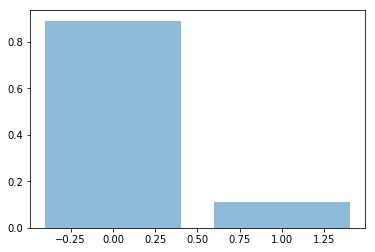

In [130]:
total_sum_eigenValues = sum(eig_val)
var_exp = [(i/total_sum_eigenValues) for i in sorted(eig_val,reverse=True)]
plt.bar(np.arange(len(eig_val)),var_exp,alpha=0.5,align='center',label='indivisual explained variance')
var_exp

Text(0, 0.5, 'Y values [Standardized]')

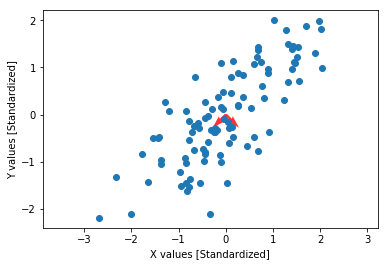

In [138]:
fig = plt.figure(2)
ax = fig.add_subplot(111)
mean_x = x_std.mean()
mean_y = y_std.mean()
for v in eig_vec:
    ax.quiver(
        mean_x, mean_y, # <-- starting point of vector
        v[0] - mean_x, v[1] - mean_y, # <-- directions of vector
        color = 'red', alpha = .8, lw = 3,
    )
plt.plot(x_std, y_std, 'o')
plt.axis('equal')
plt.xlabel("X values [Standardized]")
plt.ylabel("Y values [Standardized]")

The plot below shows the axis on which the data is going to be projected. Since, most of the data is going to be projected on X-axis, we are  going to select only this as principal component.

Text(0, 0.5, 'Y values [Standardized]')

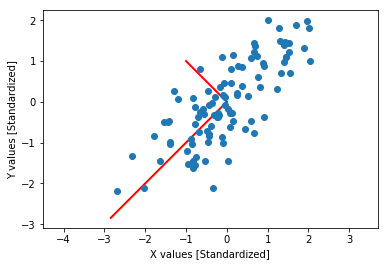

In [143]:
for e, v in zip(eig_val,eig_vec.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'r-', lw=2)
plt.plot(x_std, y_std, 'o')
plt.axis('equal')
plt.xlabel("X values [Standardized]")
plt.ylabel("Y values [Standardized]")

# Step 4: Feature vector

In [136]:
feature_vector = eigenValue_eigenVector_pairs[eig_val[0]].reshape(2,1) # Choosing only 1st Eigen Vector as it has 90 % of explained Variance

In [144]:
feature_vector # => This is the Principal Component

array([[-0.70710678],
       [ 0.70710678]])

# Step 5: Recast the data along the principal components axes

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.



In [145]:
FinalDataset = feature_vector.T.dot(np.array([x_std,y_std])) # => Projecting the 2D data onto 1D using feature Vector

In [135]:
FinalDataset.shape

(1, 100)